In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist 
from tensorflow import keras
from tensorflow.keras. layers import Dense, Flatten 
%matplotlib inline

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

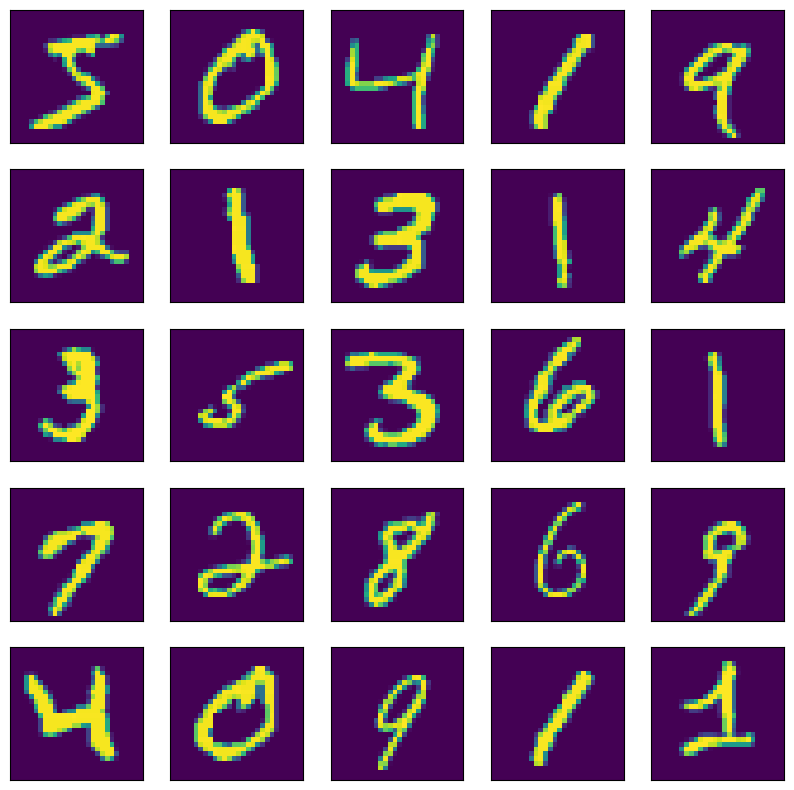

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
     

Постоим модель

In [15]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer="adam", 
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [18]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2828 - accuracy: 0.9191 - val_loss: 0.1566 - val_accuracy: 0.9533
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1193 - accuracy: 0.9649 - val_loss: 0.1150 - val_accuracy: 0.9670
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0820 - accuracy: 0.9757 - val_loss: 0.1027 - val_accuracy: 0.9691
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0618 - accuracy: 0.9812 - val_loss: 0.0884 - val_accuracy: 0.9741
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0933 - val_accuracy: 0.9718
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0375 - accuracy: 0.9891 - val_loss: 0.0900 - val_accuracy: 0.9735
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 0.0837 - val_accuracy

In [20]:
test_loss, test_accurasy = model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 2s 4ms/step - loss: 0.0845 - accuracy: 0.9772


In [22]:
print(f"Loss: {test_loss}, Accuracy: {test_accurasy}")

Loss: 0.08454401046037674, Accuracy: 0.9771999716758728


Проверим работу модели на нескольких изображениях 

1/1 [==============================] - 0s 24ms/step
Предсказанная цифра: 7, Верный ответ: 7


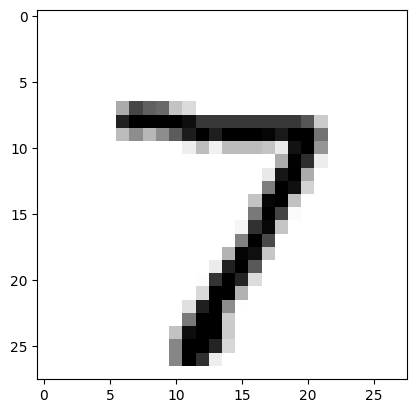

In [26]:
x = np.expand_dims(x_test[0], axis=0)
result = model.predict(x)
print(f"Предсказанная цифра: {np.argmax(result)}, Верный ответ: {y_test[0]}")

plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

1/1 [==============================] - 0s 41ms/step
Предсказанная цифра: 1, Верный ответ: 1


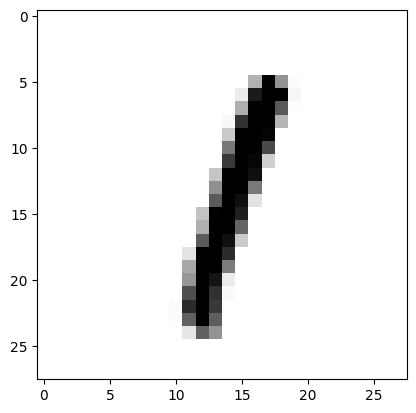

In [27]:
x = np.expand_dims(x_test[5], axis=0)
result = model.predict(x)
print(f"Предсказанная цифра: {np.argmax(result)}, Верный ответ: {y_test[5]}")

plt.imshow(x_test[5], cmap=plt.cm.binary)
plt.show()

1/1 [==============================] - 0s 35ms/step
Предсказанная цифра: 5, Верный ответ: 5


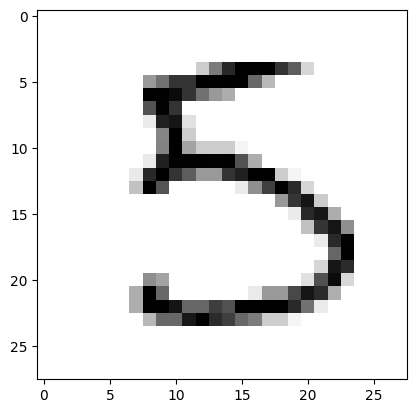

In [28]:
x = np.expand_dims(x_test[15], axis=0)
result = model.predict(x)
print(f"Предсказанная цифра: {np.argmax(result)}, Верный ответ: {y_test[15]}")

plt.imshow(x_test[15], cmap=plt.cm.binary)
plt.show()

Теперь предскажим наши ответы на всей тестовой выборке

In [32]:
pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 2ms/step


Посмотрим где ошибалась наша нейронная сеть 

In [34]:
mask = pred == y_test

x_loss = x_test[~mask]
y_loss = pred[~mask]

x_loss.shape

(228, 28, 28)

Мы видим, что ложных ответов было в сумме 228, посмотрим первые 10 и оценим сами изображения

Предсказание: 6, верный ответ: 7


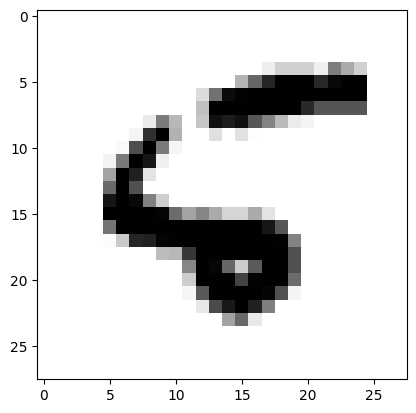

Предсказание: 9, верный ответ: 2


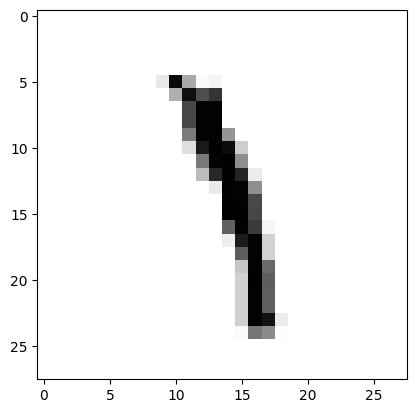

Предсказание: 8, верный ответ: 1


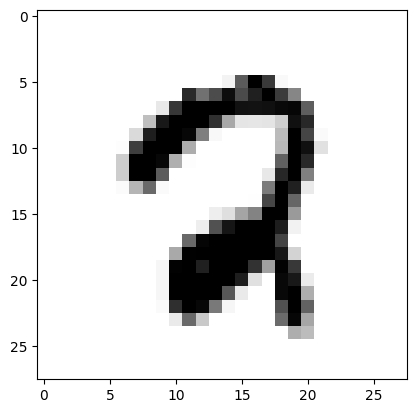

Предсказание: 9, верный ответ: 0


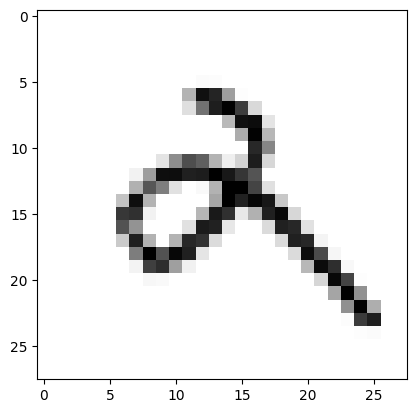

Предсказание: 2, верный ответ: 4


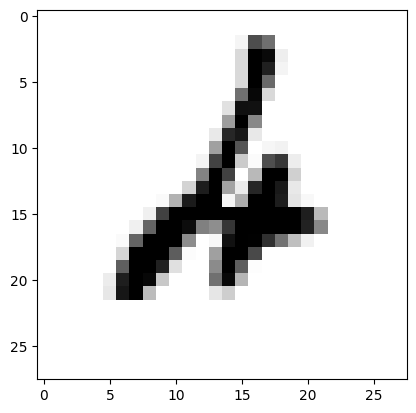

Предсказание: 7, верный ответ: 1


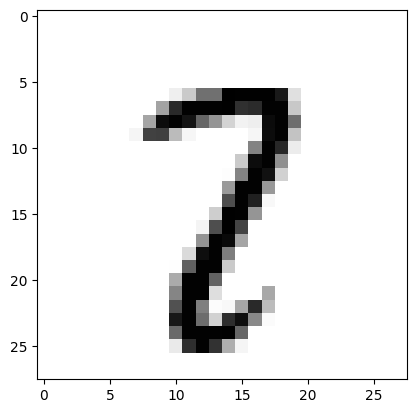

Предсказание: 3, верный ответ: 4


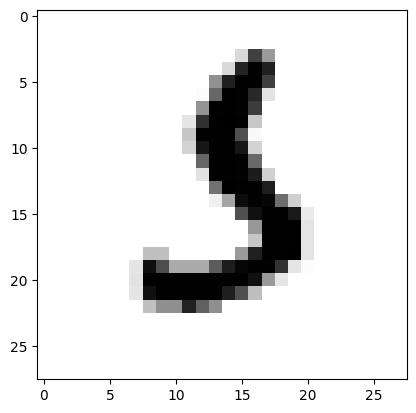

Предсказание: 0, верный ответ: 9


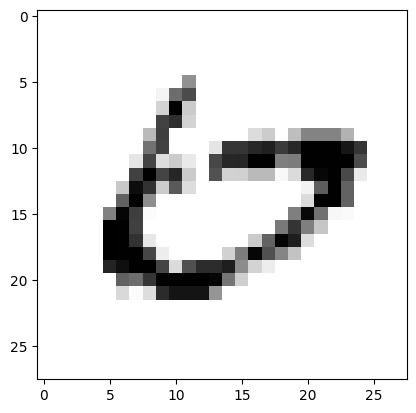

Предсказание: 5, верный ответ: 5


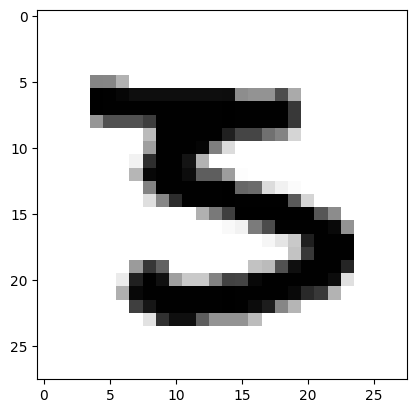

Предсказание: 2, верный ответ: 9


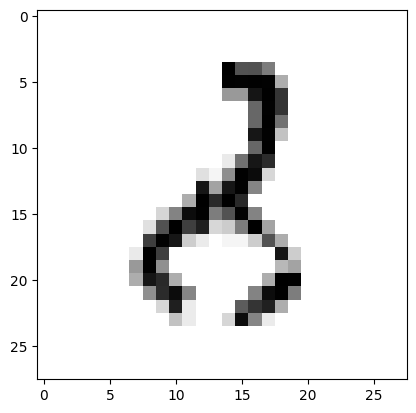

In [36]:
for i in range(10):
  print(f"Предсказание: {y_loss[i]}, верный ответ: {y_test[i]}")
  plt.imshow(x_loss[i], cmap=plt.cm.binary)
  plt.show()

Тут можно видеть, что у нас ошибочные изображения очень плохого качетства, поэтому моя нейронная сеть показала хороший результат 
